In [52]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio
import os
# name of the input file
imname = "cs180 proj1 data/cathedral.jpg"

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]
print(b.shape)
print(g.shape)
print(r.shape)

(341, 390)
(341, 390)
(341, 390)


In [53]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)
def L2_norm(im1, im2):
    assert (im1.shape == im2.shape)
    crop = max(im1.shape) // 10
    im1_crop = im1[crop:-crop, crop:-crop]
    im2_crop = im2[crop:-crop, crop:-crop]

    return np.sqrt(np.sum(np.square(im1_crop - im2_crop)))

def NCC(im1, im2):
    assert (im1.shape == im2.shape)
    crop = max(im1.shape) // 10

    im1_crop = im1[crop:-crop, crop:-crop]
    im2_crop = im2[crop:-crop, crop:-crop]

    im1_standardized = (im1_crop - np.mean(im1_crop)) / np.std(im1_crop)
    im2_standardized = (im2_crop - np.mean(im2_crop)) / np.std(im2_crop)
    return np.sum(im1_standardized * im2_standardized)



def align(im1, target_im, displacement, scoring_func):
    best_score = float('-inf')
    best_alignment = im1
    best_shift = (0,0)
    for dx in range(-displacement, displacement):
        for dy in range(-displacement, displacement):
            displaced_image = np.roll(im1, (dx, dy), (1,0))
            score = scoring_func(displaced_image, target_im)
            if score > best_score:
                best_score = score
                best_alignment = displaced_image
                best_shift = (dx, dy)
    return best_alignment, best_shift


def image_pyramid(im1, im2):
    ...



def pyramid_helper(best_index):
    ...


In [54]:
ag, g_shift = align(g, b, 20, NCC)
ar, r_shift = align(r, b, 20, NCC)
# create a color image
# im_out = np.dstack([r, g, b])
im_out = np.dstack([ar, ag, b])
print("g_shift", g_shift)
print("r_shift", r_shift)

g_shift (2, 5)
r_shift (3, 12)


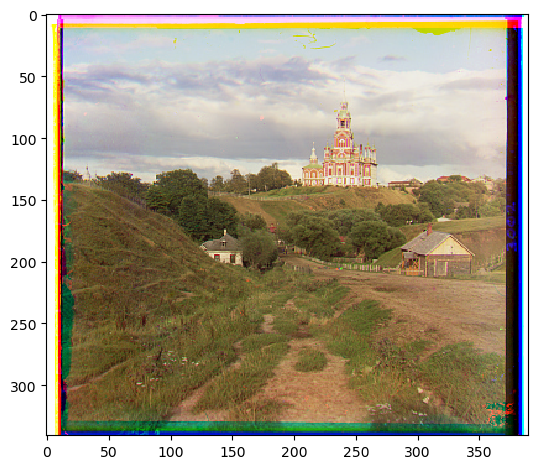

In [55]:
fname = 'out_path/NCC_cathedral_10percent_crop_15_displacement.jpg'


from skimage import img_as_ubyte
saveable_image = img_as_ubyte(np.clip(im_out, 0, 1))
skio.imsave(fname, saveable_image)

# skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()